# Hysteresis
Sean Wade

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from __future__ import division
import seaborn

In [22]:
%matplotlib inline

In [23]:
def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7,maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton✬s method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, X

### Example

In [24]:
def F(x, lmbda):
    return x**2 + lmbda

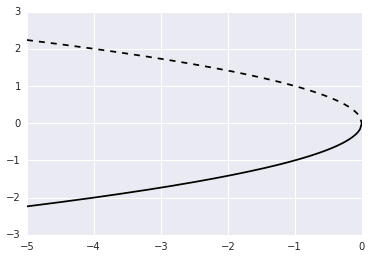

In [25]:
C1, X1 = EmbeddingAlg(np.linspace(-5, 0, 200), np.sqrt(5), F)
C2, X2 = EmbeddingAlg(np.linspace(-5, 0, 200), -np.sqrt(5), F)

plt.plot(C1, X1, '--k', label='Unstable')
plt.plot(C2, X2, 'k', label='Stable')
plt.show()

### Problem 1

In [26]:
def F(x, lmbda):
    return -x**3 + lmbda*x

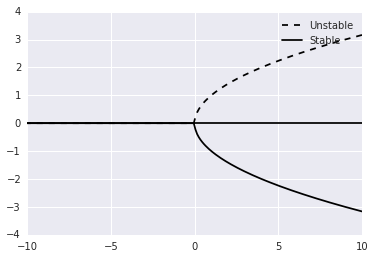

In [27]:
C1, X1 = EmbeddingAlg(np.linspace(-10, 10, 200)[::-1], np.sqrt(5), F)
C2, X2 = EmbeddingAlg(np.linspace(-10, 10, 200)[::-1], -np.sqrt(5), F)
C3, X3 = EmbeddingAlg(np.linspace(-10, 10, 200)[::-1], 0, F)

plt.plot(C1, X1, '--k',label='Unstable')
plt.plot(C2, X2, 'k', label='Stable')
plt.plot(C3, X3, 'k')
plt.legend()
plt.show()

### Problem 2

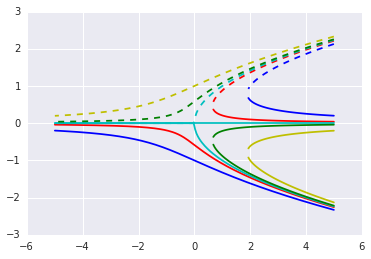

In [34]:
n_list = [-1., -.2, 0, .2, 1.]
colors = ['b', 'r', 'c', 'g','y']

def F2(x, lmbda):
    return n + lmbda*x - x**3
    
for i, n in enumerate(n_list):   
    C1, X1 = EmbeddingAlg(np.linspace(-5, 5, 200)[::-1], np.sqrt(5), F2)
    C2, X2 = EmbeddingAlg(np.linspace(-5, 5, 200)[::-1], -np.sqrt(5), F2)
    C3, X3 = EmbeddingAlg(np.linspace(-5, 5, 200)[::-1], 0, F2)

    plt.plot(C1, X1, '--', c=colors[i])
    plt.plot(C2, X2, '-', c=colors[i])
    plt.plot(C3, X3, '-', c=colors[i])
plt.show()

### Problem 3

In [38]:
r = .56
def F(x, k):
    return r*x*(1-x/k) -(x**2)/(1+x**2)

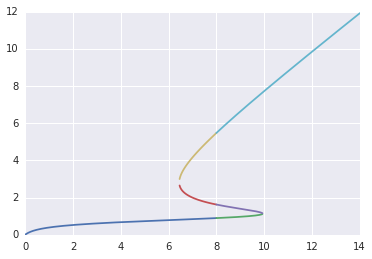

In [40]:
C1, X1 = EmbeddingAlg(np.linspace(8, 0, 500), .898, F)
C2, X2 = EmbeddingAlg(np.linspace(8, 14, 500), .898, F)
C3, X3 = EmbeddingAlg(np.linspace(8, 0, 500), 1.627, F)
C4, X4 = EmbeddingAlg(np.linspace(8, 14, 500), 1.627, F)
C5, X5 = EmbeddingAlg(np.linspace(8, 0, 500), 5.475, F)
C6, X6 = EmbeddingAlg(np.linspace(8, 14, 500), 5.475, F)

plt.plot(C1, X1)
plt.plot(C2, X2)
plt.plot(C3, X3)
plt.plot(C4, X4)
plt.plot(C5, X5)
plt.plot(C6, X6)

plt.show()